In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [85]:
df = pd.read_csv("taxitraffic.csv")

In [86]:
df

,Unnamed: 0,timestamp,value
0,0,2014-07-01 00:00:00,10844
1,1,2014-07-01 00:30:00,8127
2,2,2014-07-01 01:00:00,6210
3,3,2014-07-01 01:30:00,4656
4,4,2014-07-01 02:00:00,3820
...,...,...,...
10315,10315,2015-01-31 21:30:00,24670
10316,10316,2015-01-31 22:00:00,25721
10317,10317,2015-01-31 22:30:00,27309
10318,10318,2015-01-31 23:00:00,26591


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10320 non-null  int64 
 1   timestamp   10320 non-null  object
 2   value       10320 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 242.0+ KB


In [88]:
df.describe()

,Unnamed: 0,value
count,10320.000000,10320.000000
mean,5159.500000,15137.569380
std,2979.271723,6939.495808
min,0.000000,8.000000
25%,2579.750000,10262.000000
50%,5159.500000,16778.000000
75%,7739.250000,19838.750000
max,10319.000000,39197.000000


In [89]:
df.isnull().sum()

,0
Unnamed: 0,0
timestamp,0
value,0


In [90]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [92]:
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month

In [93]:
df

,Unnamed: 0,timestamp,value,hour,dayofweek,month
0,0,2014-07-01 00:00:00,10844,0,1,7
1,1,2014-07-01 00:30:00,8127,0,1,7
2,2,2014-07-01 01:00:00,6210,1,1,7
3,3,2014-07-01 01:30:00,4656,1,1,7
4,4,2014-07-01 02:00:00,3820,2,1,7
...,...,...,...,...,...,...
10315,10315,2015-01-31 21:30:00,24670,21,5,1
10316,10316,2015-01-31 22:00:00,25721,22,5,1
10317,10317,2015-01-31 22:30:00,27309,22,5,1
10318,10318,2015-01-31 23:00:00,26591,23,5,1


In [94]:
features = ['value', 'hour', 'dayofweek', 'month']
X = df[features]

In [95]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [107]:
# Isolation Forest
iso_forest = IsolationForest(contamination = 0.02, random_state = 42)
iso_forest.fit(X_scaled)

# Get anomaly scores
anomaly_scores_iso = iso_forest.decision_function(X_scaled)
print(anomaly_scores_iso)

[ 0.04902287  0.05234633  0.06661771 ... -0.01701741 -0.01127965
 -0.01049218]


In [108]:
# Predict anomalies (-1 for anomaly, 1 for normal)
anomaly_predictions_iso = iso_forest.predict(X_scaled)
print(anomaly_predictions_iso[:20])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


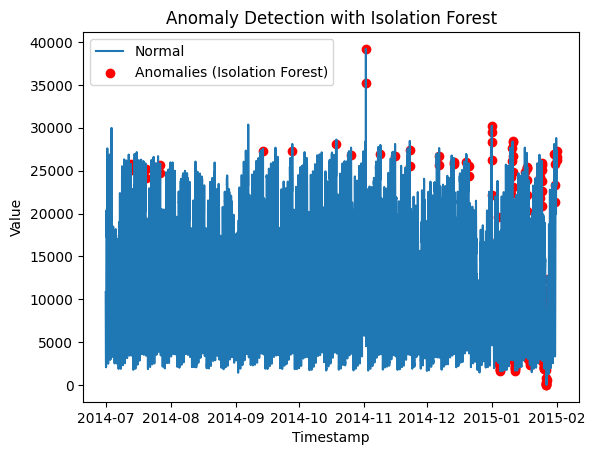

In [109]:
# Visualization
plt.plot(df['timestamp'], df['value'], label='Normal')
plt.scatter(df['timestamp'][anomaly_predictions_iso == -1], df['value'][anomaly_predictions_iso == -1], color='red', label='Anomalies (Isolation Forest)')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Anomaly Detection with Isolation Forest')
plt.legend()
plt.show()

In [125]:
# DBSCAN Clustering
dbscan = DBSCAN(eps = 0.5, min_samples = 5)
dbscan.fit(X_scaled)

# Get cluster labels (-1 for noise/anomaly)
cluster_labels_dbscan = dbscan.labels_

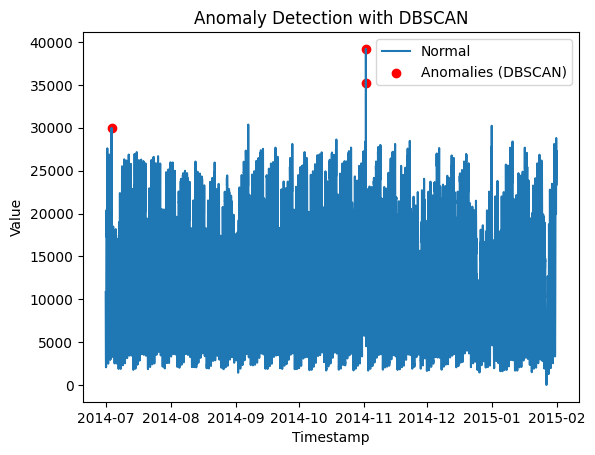

In [126]:
# Visualization
plt.plot(df['timestamp'], df['value'], label='Normal')
plt.scatter(df['timestamp'][cluster_labels_dbscan == -1], df['value'][cluster_labels_dbscan == -1], color='red', label='Anomalies (DBSCAN)')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Anomaly Detection with DBSCAN')
plt.legend()
plt.show()

In [143]:
# LOF
lof = LocalOutlierFactor(n_neighbors = 20, contamination = 'auto')  # You can adjust 'n_neighbors' and 'contamination'
lof.fit(X_scaled)

# Get anomaly scores (negative outlier factor)
anomaly_scores_lof = lof.negative_outlier_factor_
print(anomaly_scores_lof)

[-1.08797035 -1.01540183 -1.01674267 ... -1.04756178 -1.06888508
 -1.06624524]


In [144]:
# Predict anomalies (-1 for anomaly, 1 for normal)
anomaly_predictions_lof = lof.fit_predict(X_scaled)
print(anomaly_predictions_lof)

[1 1 1 ... 1 1 1]


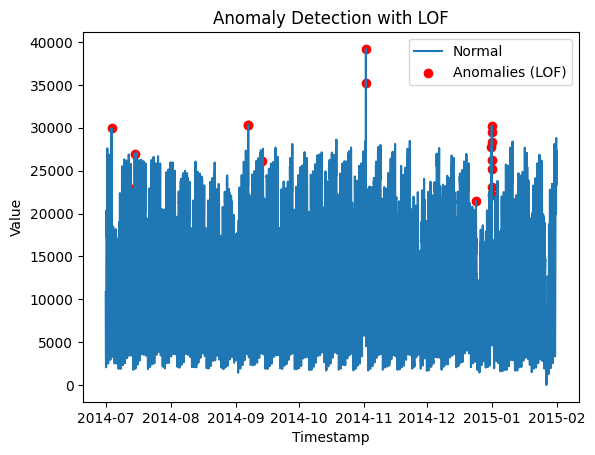

In [145]:
# Visualization
plt.plot(df['timestamp'], df['value'], label='Normal')
plt.scatter(df['timestamp'][anomaly_predictions_lof == -1], df['value'][anomaly_predictions_lof == -1], color='red', label='Anomalies (LOF)')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Anomaly Detection with LOF')
plt.legend()
plt.show()